In [44]:
from subtle.utils.io import dicom_files
from glob import glob
from tqdm import tqdm_notebook as tqdm
from subtle.subtle_metrics import psnr, ssim
import numpy as np
from subtle.subtle_preprocess import register_im
import pydicom
import shutil
import os
import SimpleITK as sitk

import matplotlib.pyplot as plt
plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (12, 10)

def norm(img):
    img = img / img.mean()
    img = np.clip(img, 0, img.max())
    return img

def get_dicom_vol(dirpath_dicom):
    dcm_files = sorted([f for f in glob('{}/*.dcm'.format(dirpath_dicom))])
    dcm = pydicom.dcmread(dcm_files[0])
    return np.array([pydicom.dcmread(f).pixel_array for f in dcm_files])

<Figure size 864x720 with 0 Axes>

In [14]:
base_path = '/home/srivathsa/projects/studies/gad/bayer/data'
cases = ['Bayer_{:04d}'.format(c) for c in range(1, 6)]

study_id_map = {}

for c in cases:
    dcm = pydicom.dcmread([d for d in glob('{}/{}/**/*.dcm'.format(base_path, c))][0])
    study_id_map[dcm.StudyInstanceUID] = c

In [16]:
for dpath_proc in glob('/home/srivathsa/projects/studies/gad/bayer/data/processed/*'):
    dcm = pydicom.dcmread([d for d in glob('{}/*.dcm'.format(dpath_proc))][0])
    study_id = dcm.StudyInstanceUID
    
    shutil.move(dpath_proc, '{}/{}/FullDoseGad'.format(base_path, study_id_map[study_id]))
    

In [51]:
case_num = 'Bayer_0001'

fd = get_dicom_vol(os.path.join(base_path, case_num, 'FullDose'))
# fd = norm(fd)
fd_gad = get_dicom_vol(os.path.join(base_path, case_num, 'FullDoseGad'))
# fd_gad = norm(fd_gad)

In [52]:
pmap = sitk.GetDefaultParameterMap('affine')
fd_gad_reg, _ = register_im(fd, fd_gad, param_map=pmap)

image registration
registration done, 6.23 s


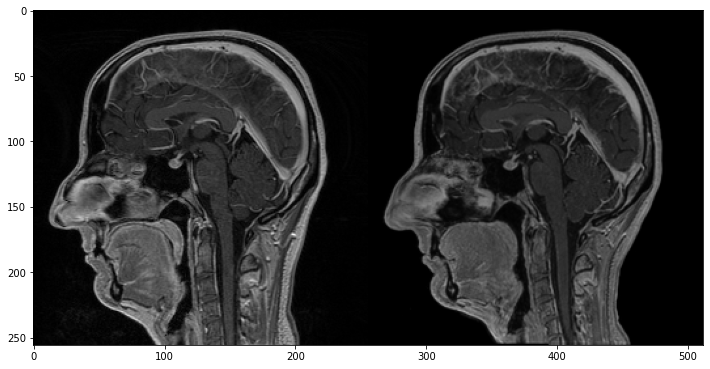

In [53]:
plt.imshow(np.hstack([fd[96], fd_gad_reg[96]]))

In [54]:
print(psnr(fd[96], fd_gad_reg[96]))
print(ssim(fd[96], fd_gad_reg[96]))

20.19024277846196
0.4933051182585669


In [43]:
print(img.min(), img.max())

0 591
